# NNFL Assignment 1
Name: Karthik Suresh

ID Number: 2018A8PS1229H

##Question 1
Implement the linear regression algorithm to estimate the weight parameters. You can
use batch gradient descent algorithm for the implementation. (a) Plot the cost function vs
 the number of iterations. (b) Plot the cost function (J) vs w1 and w2 in a contour or 3D surf
graph (w= [w0 w1 w2]). (c) Evaluate the mean square error between the actual test output
and predicted test output. Please use the files such as Training feature matrix, training
output vector, test feature matrix, test output vector for this question (Use for or while loop
for the implementation of linear regression).

In [ ]:
#all the functions we will need for the next few questions
def initialize_matrices():
  train_feature_matrix = pd.read_excel("training_feature_matrix.xlsx",header=None)
  train_output = pd.read_excel("training_output.xlsx",header=None)[1:]
  test_feature_matrix = pd.read_excel("test_feature_matrix.xlsx",header=None)
  test_output = pd.read_excel("test_output.xlsx",header=None)
  X_train = train_feature_matrix.values
  Y_train = train_output.values
  X_test = test_feature_matrix.values
  Y_test = test_output.values
  X_train,Y_train,X_test,Y_test=lin_normalise(X_train,Y_train,X_test,Y_test)
  return X_train,Y_train,X_test,Y_test

def lin_train(X_train,Y_train,learning_rate, num_epochs, X_test,Y_test, descent="batch", batch_size=None,reg=None,lmb=0):
  num_trainingexamples=X_train.shape[0]
  num_testexamples=X_test.shape[0]
  if descent is "stochastic": batch_size=1
  elif descent is "batch": batch_size=num_trainingexamples
  w_list=[]
  weights=initialise_parameters(X_train.shape)
  train_costs=[]
  test_costs=[]
  _,startcost=lin_forward_prop(X_train,weights,Y_train,reg,lmb)
  print("cost before training: " + str(startcost))
  minibatches_X, minibatches_Y = make_batches(batch_size, X_train, Y_train)
  for epoch in range(num_epochs):
    for j in range(int(num_trainingexamples/batch_size)):
      X=minibatches_X[j]
      Y=minibatches_Y[j]
      w_list.append(weights)
      hypotheses,train_cost=lin_forward_prop(X,weights,Y,reg,lmb)
      train_costs.append(train_cost)
      _,test_cost=lin_forward_prop(X_test,weights,Y_test,reg,lmb)
      test_costs.append(test_cost)
      dW=lin_back_prop(X,hypotheses,Y,reg,weights,lmb)
      weights=update_parameters(weights,dW,learning_rate)
    if descent is "batch":
      if (epoch+1)%25==0: print("cost after iteration {}: ".format(epoch+1) + str(train_cost))
    else: print("cost after epoch {}: ".format(epoch+1) + str(train_cost))
  _,f_c=lin_forward_prop(X_train,weights,Y_train)
  _,f_t=lin_forward_prop(X_test,weights,Y_test)
  print("cost after training: ", str(f_c))
  print("test set mean square error after training: ",str(f_t))
  fig = plt.figure()
  fig.suptitle('Learning Curves', fontsize=20)
  plt.xlabel('Number of Iterations', fontsize=14)
  plt.plot(range(len(train_costs)),train_costs, label = 'Training Set Cost', color = "Red")
  plt.plot(range(len(test_costs)),test_costs, label = 'Test Set Mean Square Error',color="Blue")
  plt.legend()
  return weights,train_costs,np.squeeze(np.array(w_list))

def update_parameters(weights,dW,learning_rate):
  weights = weights - learning_rate*dW
  return weights

def lin_back_prop(X_train,hypotheses,Y_train,reg=None,w=0,lmb=0):
  if reg is None:
    dW=np.dot(X_train.T,hypotheses-Y_train)/(Y_train.shape[0])
  elif reg is "l2":
    dW=(np.dot(X_train.T,hypotheses-Y_train)+lmb*w)/(Y_train.shape[0])
  elif reg is "l1":
    dW=(np.dot(X_train.T,hypotheses-Y_train)+lmb*np.sign(w))/(Y_train.shape[0])
  return dW

def make_batches(minibatch_size, X_train, Y_train):
  train_data=np.concatenate((X_train, Y_train), axis=1)
  np.random.shuffle(train_data)
  data=train_data[:,0:X_train.shape[1]],train_data[:,X_train.shape[1]:X_train.shape[1]+1]
  minibatches_X=[]
  minibatches_Y=[]
  for i in range(0, train_data.shape[0], minibatch_size):  
    minibatches_X.append(data[0][i:i + minibatch_size])
    minibatches_Y.append(data[1][i:i + minibatch_size])
  return minibatches_X, minibatches_Y

def lin_forward_prop(X,weights,Y,reg=None,lmb=0):
  hypotheses=np.dot(X,weights)
  cost=lin_compute_cost(hypotheses,Y,reg,weights,lmb)
  return hypotheses, cost

def initialise_parameters(data_shape):
  np.random.seed(0)
  weights=np.random.randn(data_shape[1],1)*5
  return weights

def lin_normalise(X_train,Y_train,X_test,Y_test):
  mean=(np.mean(X_train,axis=0,keepdims=True),np.mean(Y_train,axis=0,keepdims=True))
  std=(np.std(X_train,axis=0,keepdims=True,dtype=np.float64),np.std(Y_train,axis=0,keepdims=True,dtype=np.float64))
  X_train = (X_train-mean[0])/std[0]
  Y_train = (Y_train-mean[1])/std[1]
  X_test = (X_test-mean[0])/std[0]
  Y_test = (Y_test-mean[1])/std[1]
  return X_train,Y_train,X_test,Y_test
def lin_compute_cost(H,Y,reg=None,w=0,lmb=0):
  cost =np.mean(np.square(Y-H))/2
  if reg=="l2":
    cost=cost+lmb*np.square(np.linalg.norm(w))/2
  elif reg=="l1":
    cost = cost + np.linalg.norm(w,ord=1)
  return cost 

import math 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import io
import sys
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

cost before training: 54.48118644300796
cost after iteration 25: 2.9170655109959047
cost after iteration 50: 0.5751094583155485
cost after iteration 75: 0.468468331525627
cost after iteration 100: 0.46288363814908345
cost after iteration 125: 0.4625369202896422
cost after iteration 150: 0.46251093961675754
cost after training:  0.4625107116172998
test set mean square error after training:  1.2390640631394159
weights after training:
[[0.000821598262973237]
 [0.04143415960198833]
 [0.2606513060561128]]


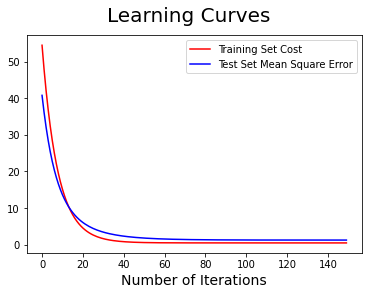

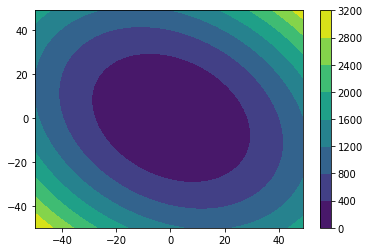

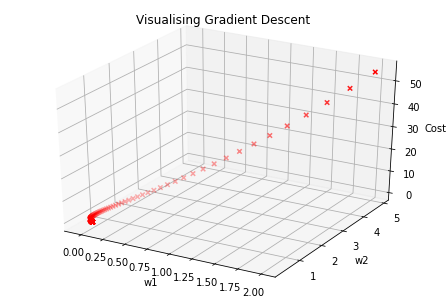

In [ ]:
X_train,Y_train,X_test,Y_test = initialize_matrices()
X_train = np.pad(X_train,[(0,0),(1,0)],mode='constant', constant_values=1)
X_test =  np.pad(X_test,[(0,0),(1,0)],mode='constant', constant_values=1)
linreg_weights,linreg_training_costs,linreg_w_list=lin_train(X_train,Y_train,0.06,150,X_test,Y_test)
print("weights after training:\n"+ str(linreg_weights))

w0=np.zeros(100)
w1 = np.arange(-50,50,1,dtype=np.float64)
w2 = np.arange(-50,50,1,dtype=np.float64)
costs=[]
for i in range(100):
  cost=[]
  for j in range(100):
    w=np.array([[0],[w1[i]],[w2[j]]])
    _,c=lin_forward_prop(X_train,w,Y_train)
    cost.append(c)
  costs.append(cost)
J=np.array(costs)+linreg_weights[0]

fig = plt.figure()
cp=plt.contourf(w1, w2, J)
plt.colorbar(cp)
plt.show()
plt.show()
fig = plt.figure()
ax = mplot3d.Axes3D(fig)
ax.scatter3D(linreg_w_list[:,1],linreg_w_list[:,2],linreg_training_costs, color = "Red",marker='x')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Visualising Gradient Descent')
plt.show()

##Question 2
Implement mini-batch and stochastic gradient descent algorithms for the linear
regression problem in question number 1. (a) Plot the cost function vs the number of
iterations. (b) Plot the cost function vs w1 and w2. (c) Evaluate the mean square error
between the actual test output and predicted test output. Please use the same data files as
in question number 1 (Use for or while loop for the implementation).

cost before training: 54.48118644300796
cost after epoch 1: 6.358180101868335
cost after epoch 2: 1.2215650559845666
cost after epoch 3: 0.578418883276756
cost after epoch 4: 0.51369047950048
cost after epoch 5: 0.5164533059519991
cost after epoch 6: 0.5214738990129716
cost after epoch 7: 0.5237201907340953
cost after epoch 8: 0.5244487844996228
cost after epoch 9: 0.524607732966521
cost after epoch 10: 0.5245979474630124
cost after training:  0.4628985645714203
test set mean square error after training:  1.2432712623707258
weights after minibatch gradient descent: 
 [[0.017080084827514837]
 [0.051622967553383345]
 [0.2771682770105096]]


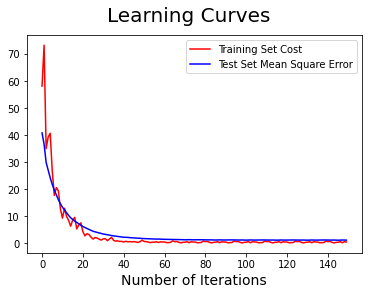

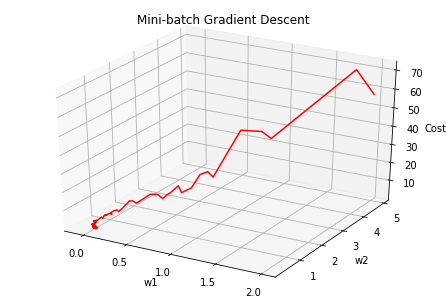

In [ ]:
#2
X_train,Y_train,X_test,Y_test=initialize_matrices()
#padding 1
X_train = np.pad(X_train,[(0,0),(1,0)],mode='constant', constant_values=1)
X_test =  np.pad(X_test,[(0,0),(1,0)],mode='constant', constant_values=1)

"""
MINIBATCH GD
learning rate = 0.05
epochs = 10
minibatch size = 16
"""
mgd_w,mgd_costs,mgd_w_list=lin_train(X_train,Y_train,0.06,10,X_test,Y_test,descent="minibatch",batch_size=16)
print("weights after minibatch gradient descent: \n",mgd_w)
fig=plt.figure()
ax = mplot3d.Axes3D(fig)
ax.plot3D(mgd_w_list[:,1],mgd_w_list[:,2],mgd_costs, color = "Red")
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Mini-batch Gradient Descent')
plt.show()

cost before training: 54.48118644300796
cost after epoch 1: 0.38342817375474103
cost after epoch 2: 0.029530528277317496
cost after epoch 3: 0.018575838028862465
cost after epoch 4: 0.01784490096942155
cost after training:  0.46520729303365815
test set mean square error after training:  1.2744585643700044
weights after stochastic gradient descent: 
 [[0.05226499074699807]
 [0.0802721221433452]
 [0.2860709397428937]]


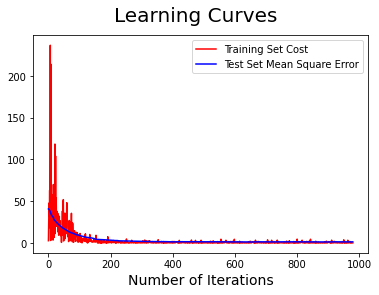

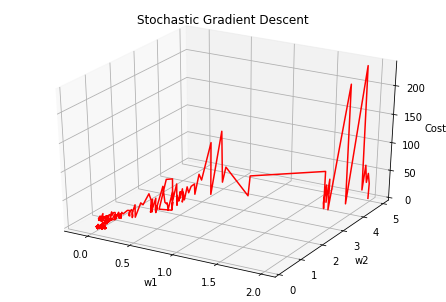

In [ ]:
"""
STOCHASTIC GD
learning rate = 0.01
epochs = 4
minibatch size = 1
"""
sgd_w,sgd_costs,sgd_w_list=lin_train(X_train,Y_train,0.01,4,X_test,Y_test,descent="stochastic")
print("weights after stochastic gradient descent: \n",sgd_w)
fig=plt.figure()
ax = mplot3d.Axes3D(fig)
ax.plot3D(sgd_w_list[:,1],sgd_w_list[:,2],sgd_costs, color = "Red")
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Stochastic Gradient Descent')
plt.show()


##Question 3
Implement the ridge regression problem by considering batch, mini-batch and stochastic gradient descent algorithms. (a) Plot the cost function vs the number of iterations for all three cases. (b) Plot the cost function (J) vs w1 and w2 in a contour or 3D surf graph for all three cases. (c) Evaluate the mean square error between the actual test output and predicted test output. Please use the same data files as in question number 1 (Use for or while loop for the implementation).



In [ ]:
#3
X_train,Y_train,X_test,Y_test=initialize_matrices()
X_train = np.pad(X_train,[(0,0),(1,0)],mode='constant', constant_values=1)
X_test =  np.pad(X_test,[(0,0),(1,0)],mode='constant', constant_values=1)

cost before training: 133.7924585477636
cost after iteration 25: 6.887862081475294
cost after iteration 50: 0.8684032234384682
cost after iteration 75: 0.547848808805542
cost after iteration 100: 0.5200464647163004
cost after iteration 125: 0.5153395873080353
cost after iteration 150: 0.5141242575348816
cost after training:  0.4625096478011703
test set mean square error after training:  1.240320022839389
weights after ridge regression: 
 [[0.0007748123686215719]
 [0.041699872913510974]
 [0.25893563459835245]]


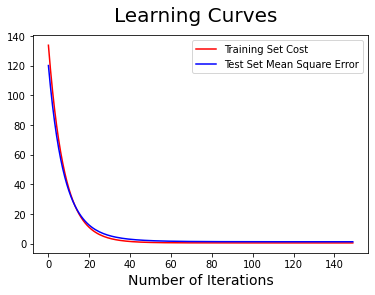

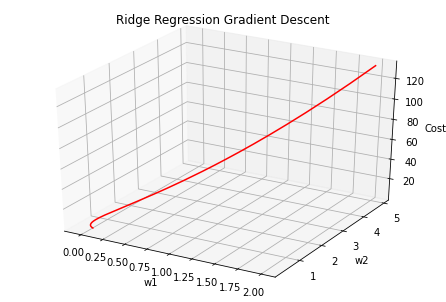

In [ ]:
#BATCH GD
l2_w,l2_costs,l2_w_list=lin_train(X_train,Y_train,0.06,150,X_test,Y_test,reg="l2",lmb=1.5)
print("weights after ridge regression: \n",l2_w)
fig=plt.figure()
ax = mplot3d.Axes3D(fig)
ax.plot3D(l2_w_list[:,1],l2_w_list[:,2],l2_costs,color = 'red')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Ridge Regression Gradient Descent')
plt.show()

cost before training: 133.7924585477636
cost after epoch 1: 16.611540818098323
cost after epoch 2: 2.5981308821788147
cost after epoch 3: 0.845163240254528
cost after epoch 4: 0.6144810412584688
cost after epoch 5: 0.5822719121533625
cost after epoch 6: 0.5765357825961366
cost after epoch 7: 0.5747393657006051
cost after epoch 8: 0.5738696713736665
cost after epoch 9: 0.5734038986102976
cost after epoch 10: 0.5731590038974812
cost after training:  0.4627140868672436
test set mean square error after training:  1.261900807791952
weights after minibatch gradient descent: 
 [[0.016274300384275388]
 [0.055006458569985414]
 [0.2519817651990642]]


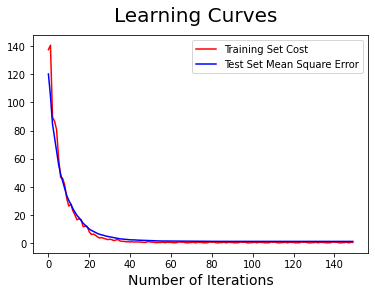

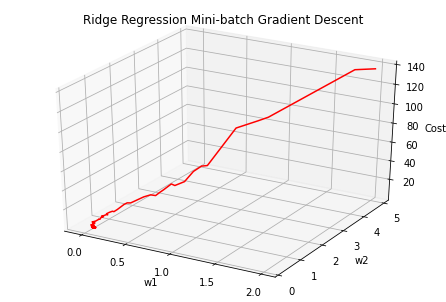

In [ ]:
#MINIBATCH GD
l2_mgd_w,l2_mgd_costs,l2_mgd_w_list=lin_train(X_train,Y_train,0.06,10,X_test,Y_test,descent="minibatch",batch_size=16,reg="l2",lmb=1.5)
print("weights after minibatch gradient descent: \n",l2_mgd_w)
fig=plt.figure()
ax = mplot3d.Axes3D(fig)
ax.plot3D(l2_mgd_w_list[:,1],l2_mgd_w_list[:,2],l2_mgd_costs, color = "Red")
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Ridge Regression Mini-batch Gradient Descent')
plt.show()

cost before training: 186.66663995093398
cost after epoch 1: 0.03311470495684349
cost after epoch 2: 0.03259707180234965
cost after epoch 3: 0.032596991946231946
cost after epoch 4: 0.03259699193328816
cost after training:  0.4797395295487631
test set mean square error after training:  1.4717122821639672
weights after stochastic gradient descent: 
 [[0.033660722844576184]
 [0.05013225990404001]
 [0.07463019539196568]]


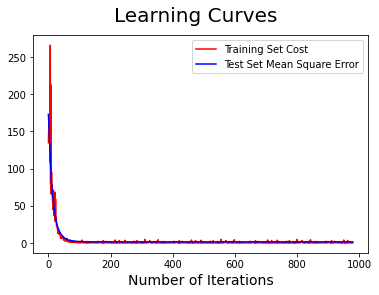

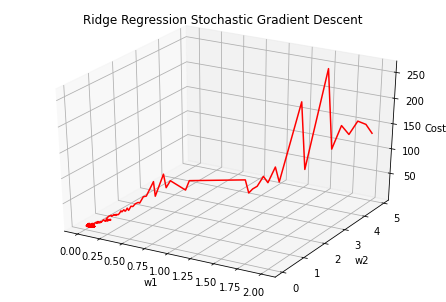

In [ ]:
#STOCHASTIC GD
l2_sgd_w,l2_sgd_costs,l2_sgd_w_list=lin_train(X_train,Y_train,0.01,4,X_test,Y_test,descent="stochastic",reg="l2",lmb=2.5)
print("weights after stochastic gradient descent: \n",l2_sgd_w)
fig=plt.figure()
ax = mplot3d.Axes3D(fig)
ax.plot3D(l2_sgd_w_list[:,1],l2_sgd_w_list[:,2],l2_sgd_costs, color = "Red")
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Ridge Regression Stochastic Gradient Descent')
plt.show()

##Question 4
Implement Least angle regression to estimate the weight parameters for the feature matrix (X) and the class label vector (y) by considering batch, mini-batch and stochastic gradient descent-based algorithms. (a) Plot the cost function vs the number of iterations for all three cases. (b) Plot the cost function (J) vs w1 and w2 in a contour or 3D surf graph for all three cases. (c) Evaluate the mean square error between the actual test output and predicted test output. Please use the same data files as in question number 1 (Use for or while loop for the implementation).

In [ ]:
#4
X_train,Y_train,X_test,Y_test=initialize_matrices()
#dummy feature is added inorder to incorporate bias in as a weight
X_train = np.pad(X_train,[(0,0),(1,0)],mode='constant', constant_values=1)
X_test =  np.pad(X_test,[(0,0),(1,0)],mode='constant', constant_values=1)

cost before training: 70.19592413521109
cost after iteration 25: 6.170926435995179
cost after iteration 50: 1.4968967175736418
cost after iteration 75: 0.8687333403380244
cost after iteration 100: 0.771679076762604
cost after iteration 125: 0.7555953835492865
cost after iteration 150: 0.7552056220060125
cost after training:  0.4625391170234528
test set mean square error after training:  1.2448544353397877
weights after Least Angle regression: 
 [[-0.00018635283251371599]
 [0.03680177513220897]
 [0.2556672470045327]]


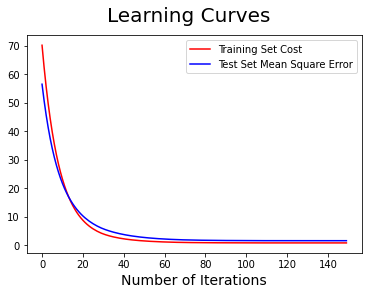

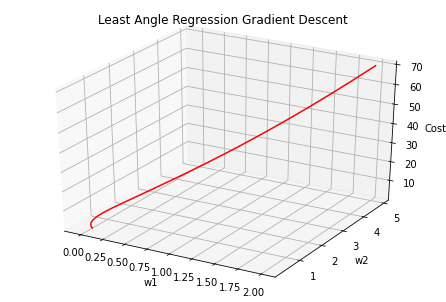

In [ ]:
#BATCH
l1_w,l1_costs,l1_w_list=lin_train(X_train,Y_train,0.06,150,X_test,Y_test,reg="l1",lmb=1.5)
print("weights after Least Angle regression: \n",l1_w)
fig=plt.figure()
ax = mplot3d.Axes3D(fig)
ax.plot3D(l1_w_list[:,1],l1_w_list[:,2],l1_costs, color = "Red")
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Least Angle Regression Gradient Descent')
plt.show()

cost before training: 133.7924585477636
cost after epoch 1: 16.611540818098323
cost after epoch 2: 2.5981308821788147
cost after epoch 3: 0.845163240254528
cost after epoch 4: 0.6144810412584688
cost after epoch 5: 0.5822719121533625
cost after epoch 6: 0.5765357825961366
cost after epoch 7: 0.5747393657006051
cost after epoch 8: 0.5738696713736665
cost after epoch 9: 0.5734038986102976
cost after epoch 10: 0.5731590038974812
cost after training:  0.4627140868672436
test set mean square error after training:  1.261900807791952
weights after minibatch gradient descent: 
 [[0.016274300384275388]
 [0.055006458569985414]
 [0.2519817651990642]]


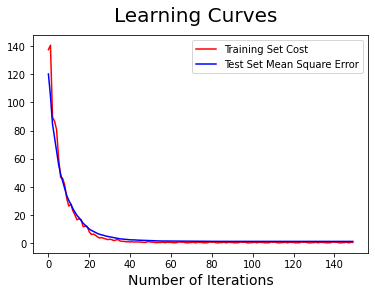

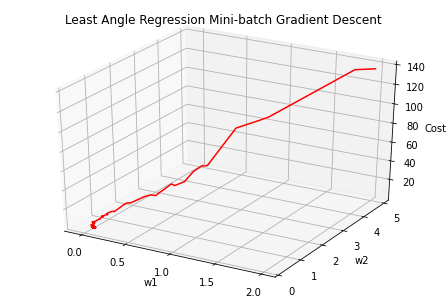

In [ ]:
#MINIBATCH
l1_mgd_w,l1_mgd_costs,l1_mgd_w_list=lin_train(X_train,Y_train,0.06,10,X_test,Y_test,descent="minibatch",batch_size=16,reg="l2",lmb=1.5)
print("weights after minibatch gradient descent: \n",l1_mgd_w)
fig=plt.figure()
ax = mplot3d.Axes3D(fig)
ax.plot3D(l1_mgd_w_list[:,1],l1_mgd_w_list[:,2],l1_mgd_costs, color = "Red")
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Least Angle Regression Mini-batch Gradient Descent')
plt.show()


cost before training: 186.66663995093398
cost after epoch 1: 0.03311470495684349
cost after epoch 2: 0.03259707180234965
cost after epoch 3: 0.032596991946231946
cost after epoch 4: 0.03259699193328816
cost after training:  0.4797395295487631
test set mean square error after training:  1.4717122821639672
weights after stochastic gradient descent: 
 [[0.033660722844576184]
 [0.05013225990404001]
 [0.07463019539196568]]


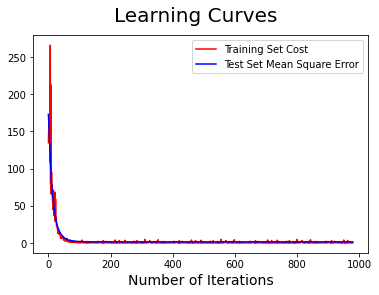

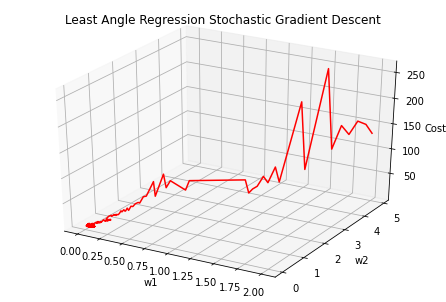

In [ ]:

#STOCHASTIC
l1_sgd_w,l1_sgd_costs,l1_sgd_w_list=lin_train(X_train,Y_train,0.01,4,X_test,Y_test,descent="stochastic",reg="l2",lmb=2.5)
print("weights after stochastic gradient descent: \n",l1_sgd_w)
fig=plt.figure()
ax = mplot3d.Axes3D(fig)
ax.plot3D(l1_sgd_w_list[:,1],l1_sgd_w_list[:,2],l1_sgd_costs, color = "Red")
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')
ax.set_title('Least Angle Regression Stochastic Gradient Descent')
plt.show()

##Question 5
Implement the vectorized linear regression, ridge regression and least angle regression problems to evaluate the weight parameters for question number 1. Compare the weight parameters of vectorization-based methods with the weights obtained using batch, mini-batch and stochastic gradient descent-based algorithms. Please use the same data files as in question number 1. Evaluate the mean square error between the actual test output and predicted test output.

In [ ]:
#5
X_train,Y_train,X_test,Y_test=initialize_matrices()
X_train = np.pad(X_train,[(0,0),(1,0)],mode='constant', constant_values=1)
X_test =  np.pad(X_test,[(0,0),(1,0)],mode='constant', constant_values=1)

X=np.c_[X_train]
Y=np.c_[Y_train]
X_t=np.c_[X_test]
Y_t=np.c_[Y_test]

def regression_normal_eq(X,Y,X_t,Y_t,reg=None,lmb=0):
  """
  inputs:
  X,Y -- training data
  X_t,Y_t -- testing data
  reg -- type of regularisation
  lmb -- hyperparameter lambda for the regularisation
  outputs:
  W -- weights after vectorised optimisation of cost of the model
  cost -- minimised cost
  """
  if reg == None:
    W = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
  elif reg == "l2":
    W=np.dot(np.linalg.inv(np.dot(X.T,X)+lmb*np.identity(X.shape[1])),np.dot(X.T,Y))
  elif reg == "l1":
    temp=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y)-lmb/2),np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y)+lmb/2)
    tempcosts=lin_compute_cost(np.dot(X,temp[0]),Y,reg,temp[0],lmb),lin_compute_cost(np.dot(X,temp[1]),Y,reg,temp[1],lmb)
    W=temp[np.argmin(tempcosts)]
  H=np.dot(X,W)
  cost=lin_compute_cost(H,Y,reg,W,lmb)
  print("cost after optimisation:", cost)
  H_t=np.dot(X_t,W)
  test_error=lin_compute_cost(H_t,Y_t,reg,W,lmb)
  print("mean squared error after optimisation:", test_error)
  return W,cost

#using the closed form equations we can get the answer
neq_w,neq_cost=regression_normal_eq(X,Y,X_t,Y_t)
print("weights after normal equation optimisation:\n", neq_w)
print('\n')
l2_neq_w,l2_neq_cost=regression_normal_eq(X,Y,X_t,Y_t,reg="l2",lmb=1.5)
print("weights after ridge regression normal equation optimisation:\n", l2_neq_w)
print('\n')
l1_neq_w,l1_neq_cost=regression_normal_eq(X,Y,X_t,Y_t,reg="l1",lmb=1.5)
print("weights after least angle regression normal equation optimisation:\n", l1_neq_w)

cost after optimisation: 0.46250841173232077
mean squared error after optimisation: 1.2382667502565394
weights after normal equation optimisation:
 [[-1.9818556441597995e-15]
 [0.04305286494979317]
 [0.2589880005733127]]


cost after optimisation: 0.5135885824875226
mean squared error after optimisation: 1.2906497725431623
weights after ridge regression normal equation optimisation:
 [[-1.9682079552107032e-15]
 [0.043229006443784856]
 [0.25736447493958]]


cost after optimisation: 0.7628074690775913
mean squared error after optimisation: 1.5375413440400898
weights after least angle regression normal equation optimisation:
 [[-0.003061224489797898]
 [0.04064532082561573]
 [0.2565804564491353]]


##Question 6 
Implement K-means clustering based unsupervised learning algorithm for the dataset(“data2.xlsx”). Plot the estimated class labels vs features. Use the number of clusters as K=3.

clustered after 12 iterations


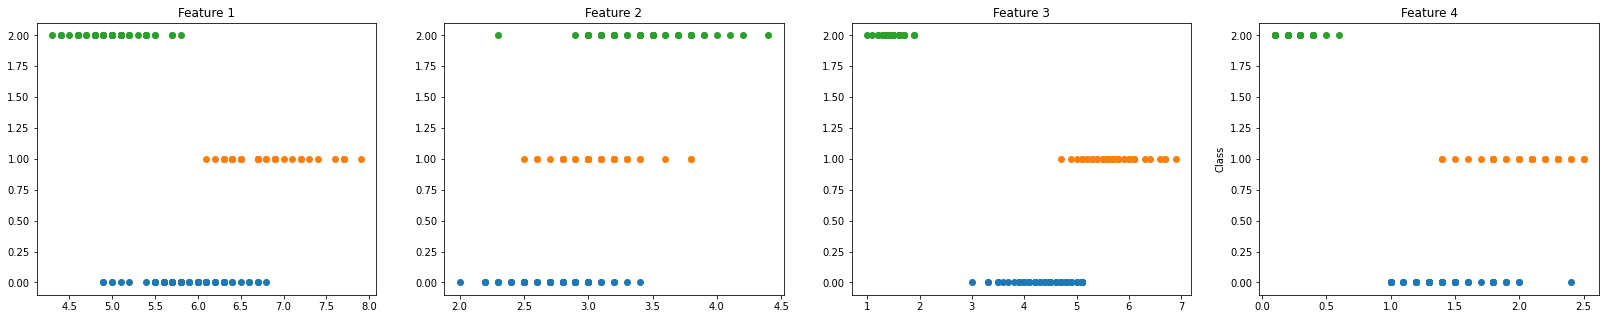

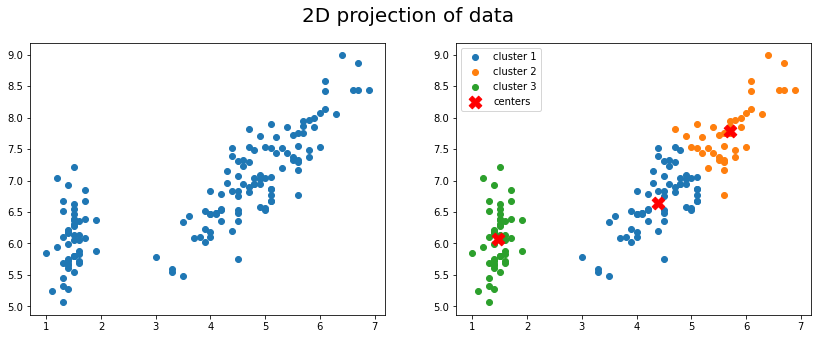

In [ ]:
#6
data2 = np.array(pd.read_excel("data2.xlsx",header=None))

def calculate_distance(start,end):
  dist=np.sum((end-start)**2,axis=1)
  dist=np.sqrt(dist)
  return dist

def project_to_2d(data,del_col=None):
  if del_col is None:
    dev=np.std(data,axis=0)
    del_col=np.argmax(dev)
  X=data[:,del_col]
  dist_cols=np.delete(data,del_col,axis=1)
  orig=np.zeros((data.shape[0],data.shape[1]-1))
  Y=calculate_distance(orig,dist_cols)
  projection=np.vstack((X, Y)).T
  return projection, del_col

def reset_clusters(data,clusters,cache=None,iter=0):
  k=len(clusters)
  k_means=[]
  truth=[True]
  for i in range(k):
    k_means.append(np.mean(clusters[i],axis=0,keepdims=True)) 
    if cache!=None: truth.append(calculate_distance(k_means[i],cache[i])<=0.00001)
  if cache!=None and all(truth): return clusters, iter, k_means
  else:
    new_clusters=[]
    for i in range(k):
      new_clusters.append([])
    centre_dists=[]
    for mean in k_means:
      centre_dists.append(calculate_distance(mean,data))
    centre_dists=np.array(centre_dists)
    nearest_mean=np.argmin(centre_dists,axis=0)
    for i in range(nearest_mean.shape[0]):
      new_clusters[nearest_mean[i]].append(data[i])
    return reset_clusters(data,new_clusters,k_means,iter+1)

def k_means_cluster(k,data):
  np.random.seed(0)
  pr,del_col=project_to_2d(data2)
  np.random.shuffle(data)
  temp_clusters=np.array_split(data,k,axis=0)
  clusters,iter,centers=reset_clusters(data,temp_clusters)
  print("clustered after {} iterations".format(iter))
  fig,axs = plt.subplots(1,data.shape[1])
  fig.set_figheight(5)
  fig.set_figwidth(28)
  for i in range(data.shape[1]):
    for j in range(k):
      axs[i].scatter(x = np.array(clusters[j])[:,i],y=[j]*len(clusters[j]))
      axs[i].set_title('Feature '+str(i+1))
      plt.ylabel('Class')
  fig, axs = plt.subplots(1,2)
  fig.set_figheight(5)
  fig.set_figwidth(14)
  fig.suptitle('2D projection of data', fontsize=20)
  axs[0].scatter(pr[:,0],pr[:,1], label = 'unclustered data')
  for i in range(k):
    name="cluster "+ str(i+1)
    pr,_=project_to_2d(np.array(clusters[i]),del_col)
    axs[1].scatter(pr[:,0],pr[:,1], label = name)
  cr,_=project_to_2d(np.squeeze(np.array(centers)),del_col)
  axs[1].scatter(cr[:,0],cr[:,1], label = "centers", color="red",marker="X",s=160)
  plt.legend(loc='best')
  return clusters,centers

ans,cent=k_means_cluster(3,data2)

##Question 7
Implement the logistic regression algorithm for the binary classification using the dataset (“data3.xlsx”). Divide the dataset into training and testing using hold-out cross-validation technique with 60 % of instances as training and the remaining 40% as testing. Evaluate the accuracy, sensitivity and specificity values for the binary classifier.

In [ ]:

def getcol(data,c):
    col = []
    for i in range(len(data)):
        col.append(data[i][c])
    return col

def set(y):
    for i in range(len(y)):
        if(y[i]>0.5):
            y[i] = 1
        if(y[i]<0.5):
            y[i] = 0
    return y

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# A function to return the updated values of m,c after one iteration of gradient descent
def wtupdate(m1,m2,m3,m4,c,x,y):
    sumvm1 = 0
    sumvm2 = 0
    sumvm3 = 0
    sumvm4 = 0
    sumvc = 0
    yp = [0 for i in range(len(x))]
    for i in range(len(x)):
        yp[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + c
        yp[i] = sigmoid(yp[i])
        sumvm1 = sumvm1 - (y[i]-yp[i])*x[i,0]
        sumvm2 = sumvm2 - (y[i]-yp[i])*x[i,1]
        sumvm3 = sumvm3 - (y[i]-yp[i])*x[i,2]
        sumvm4 = sumvm4 - (y[i]-yp[i])*x[i,3]
        sumvc = sumvc - (y[i]-yp[i])
    m1 = m1 - 0.05*sumvm1
    m2 = m2 - 0.05*sumvm2
    m3 = m3 - 0.05*sumvm3
    m4 = m4 - 0.05*sumvm4
    c = c - 0.05*sumvc
    return m1,m2,m3,m4,c

# A function to return the slope and intercept of y^
def linreg(x,y):
    m1 = 0
    m2 = 0
    m3 = 0
    m4 = 0
    c = 0
    iters = 1000
    i = 0
    while(i<iters):
        m1,m2,m3,m4,c = wtupdate(m1,m2,m3,m4,c,x,y)
        i = i+1
    return m1,m2,m3,m4,c

# A function to implement min-max normalization
def norm(data):
    ndata = data
    for i in range(5):
        maxval = max(getcol(data,i))
        minval = min(getcol(data,i))
        for j in range(len(data)):
            ndata[j][i] = (data[j][i]-minval)/((maxval-minval)+0.05)
    return ndata

In [ ]:
#7
# import the data
data = pd.read_excel('data3 (1).xlsx',header=None)
# normalize the data
data = np.asarray(data)
data = norm(data)

# split into dependent and independent variables
x = data[:,:-1]
y = data[:,-1]

# split into testing and training sets
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.4,random_state=45)
m1,m2,m3,m4, c = linreg(x_tr,y_tr)
x = x_ts
yp = [0 for i in range(len(x))]
for i in range(len(x)):
    yp[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + c
    yp[i] = sigmoid(yp[i])
y_ts = set(y_ts)
yp = set(yp)
y_actual = pd.Series(y_ts, name='Actual')
y_pred = pd.Series(yp, name='Predicted')
confmat = pd.crosstab(y_actual, y_pred)
print(confmat)
confmat = np.asarray(confmat)
tp = confmat[1][1]
tn = confmat[0][0]
fp = confmat[0][1]
fn = confmat[1][0]

Acc = (tp+tn)/(tp+tn+fp+fn)
SE = tp/(tp+fn)
SP = tn/(tn+fp)

print('Accuracy : ' + str(Acc))
print('sensitivity : ' + str(SE))
print('specificity : ' + str(SP))

Predicted   0   1
Actual           
0.0        22   0
1.0         0  18
Accuracy : 1.0
sensitivity : 1.0
specificity : 1.0


##Question 8
Implement the multiclass logistic regression algorithm using both “One VS All” and “One VS One” multiclass coding techniques. Evaluate the performance of the multiclass classifier using individual class accuracy and overall accuracy measures. Use the hold-out cross-validation approach (60% training and 40% testing) for the selection of training and test instances. (Please use the dataset “data4.xlsx”)

##ONEvsALL

In [ ]:
#8 ONEvsALL
import pandas as pd
import math 
import numpy as np
from sklearn.model_selection import train_test_split



def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# A function to return the updated values of m,c after one iteration of gradient descent
def wtupdate(m1,m2,m3,m4,m5,m6,m7,c,x,y):
    sumvm1 = 0
    sumvm2 = 0
    sumvm3 = 0
    sumvm4 = 0
    sumvm5 = 0
    sumvm6 = 0
    sumvm7 = 0
    sumvc = 0
    yp = [0 for i in range(len(x))]
    for i in range(len(x)):
        yp[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + (m5*x[i,4]) + (m6*x[i,5]) + (m7*x[i,6]) + c
        yp[i] = sigmoid(yp[i])
        sumvm1 = sumvm1 - (y[i]-yp[i])*x[i,0]
        sumvm2 = sumvm2 - (y[i]-yp[i])*x[i,1]
        sumvm3 = sumvm3 - (y[i]-yp[i])*x[i,2]
        sumvm4 = sumvm4 - (y[i]-yp[i])*x[i,3]
        sumvm5 = sumvm5 - (y[i]-yp[i])*x[i,4]
        sumvm6 = sumvm6 - (y[i]-yp[i])*x[i,5]
        sumvm7 = sumvm7 - (y[i]-yp[i])*x[i,6]
        sumvc = sumvc - (y[i]-yp[i])
    m1 = m1 - 0.1*sumvm1
    m2 = m2 - 0.1*sumvm2
    m3 = m3 - 0.1*sumvm3
    m4 = m4 - 0.1*sumvm4
    m5 = m5 - 0.1*sumvm5
    m6 = m6 - 0.1*sumvm6
    m7 = m7 - 0.1*sumvm7
    c = c - 0.1*sumvc
    return m1,m2,m3,m4,m5,m6,m7,c

# A function to return the slope and intercept of y^
def linreg(x,y):
    m1 = 0
    m2 = 0
    m3 = 0
    m4 = 0
    m5 = 0
    m6 = 0
    m7 = 0
    c = 0
    iters = 2000
    i = 0
    while(i<iters):
        m1,m2,m3,m4,m5,m6,m7,c = wtupdate(m1,m2,m3,m4,m5,m6,m7,c,x,y)
        i = i+1
    return m1,m2,m3,m4,m5,m6,m7,c




# import the data
data = pd.read_excel('data4.xlsx',header=None)
data = np.asarray(data)
y = data[:,-1]
data = norm(data)
x = data[:,:-1]


# split into testing and training sets
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.4,random_state=5)

y1_tr = [1 for i in range(len(y_tr))]
y2_tr = [1 for i in range(len(y_tr))]
y3_tr = [1 for i in range(len(y_tr))]
for i in range(len(y_tr)):
    if(y_tr[i] != 1):
        y1_tr[i] = 0
    if(y_tr[i] != 2):
        y2_tr[i] = 0
    if(y_tr[i] != 3):
        y3_tr[i] = 0

x = x_ts

m1,m2,m3,m4,m5,m6,m7,c = linreg(x_tr,y1_tr)
yp1 = [0 for i in range(len(x))]
for i in range(len(x)):
    yp1[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + (m5*x[i,4]) + (m6*x[i,5]) + (m7*x[i,6]) + c
    yp1[i] = sigmoid(yp1[i])
yp1 = set(yp1)

m1,m2,m3,m4,m5,m6,m7,c = linreg(x_tr,y2_tr)
yp2 = [0 for i in range(len(x))]
for i in range(len(x)):
    yp2[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + (m5*x[i,4]) + (m6*x[i,5]) + (m7*x[i,6]) + c
    yp2[i] = sigmoid(yp2[i])
yp2 = set(yp2)

m1,m2,m3,m4,m5,m6,m7,c = linreg(x_tr,y3_tr)
yp3 = [0 for i in range(len(x))]
for i in range(len(x)):
    yp3[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + (m5*x[i,4]) + (m6*x[i,5]) + (m7*x[i,6]) + c
    yp3[i] = sigmoid(yp3[i])
yp3 = set(yp3)

cval = [0 for i in range(len(y_ts))]
for i in range(len(y_ts)):
    if (yp1[i] == 1):
        cval[i] = 1.0
    if (yp2[i] == 1):
        cval[i] = 2.0
    if (yp3[i] == 1):
        cval[i] = 3.0


for i in range(len(cval)):
    if (cval[i] == 0):
        cval[i] = 'None'
y_actual = pd.Series(y_ts, name='Actual')
y_pred = pd.Series(cval, name='Predicted')
confmat = pd.crosstab(y_actual, y_pred)
print(confmat)

confmat = np.asarray(confmat)
Acc = (confmat[0][0] + confmat[1][1] + confmat[2][2])/sum(sum(confmat))
Acc1 = confmat[0][0]/sum(confmat[0])
Acc2 = confmat[1][1]/sum(confmat[1])
Acc3 = confmat[2][2]/sum(confmat[2])
print('Overall Accuracy : ' + str(Acc))
print('Accuracy of class 1 : ' + str(Acc1))
print('Accuracy of class 2 : ' + str(Acc2))
print('Accuracy of class 3 : ' + str(Acc3))

Predicted  1.0  2.0  3.0
Actual                  
1.0         20    0    0
2.0          0   20    1
3.0          0    2   17
Overall Accuracy : 0.95
Accuracy of class 1 : 1.0
Accuracy of class 2 : 0.9523809523809523
Accuracy of class 3 : 0.8947368421052632


##ONEvsONE

In [ ]:
#8 ONEvsONE
import pandas as pd
import math 
import numpy as np
from sklearn.model_selection import train_test_split



def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# A function to return the updated values of m,c after one iteration of gradient descent
def wtupdate(m1,m2,m3,m4,m5,m6,m7,c,x,y):
    sumvm1 = 0
    sumvm2 = 0
    sumvm3 = 0
    sumvm4 = 0
    sumvm5 = 0
    sumvm6 = 0
    sumvm7 = 0
    sumvc = 0
    yp = [0 for i in range(len(x))]
    for i in range(len(x)):
        yp[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + (m5*x[i,4]) + (m6*x[i,5]) + (m7*x[i,6]) + c
        yp[i] = sigmoid(yp[i])
        sumvm1 = sumvm1 - (y[i]-yp[i])*x[i,0]
        sumvm2 = sumvm2 - (y[i]-yp[i])*x[i,1]
        sumvm3 = sumvm3 - (y[i]-yp[i])*x[i,2]
        sumvm4 = sumvm4 - (y[i]-yp[i])*x[i,3]
        sumvm5 = sumvm5 - (y[i]-yp[i])*x[i,4]
        sumvm6 = sumvm6 - (y[i]-yp[i])*x[i,5]
        sumvm7 = sumvm7 - (y[i]-yp[i])*x[i,6]
        sumvc = sumvc - (y[i]-yp[i])
    m1 = m1 - 0.1*sumvm1
    m2 = m2 - 0.1*sumvm2
    m3 = m3 - 0.1*sumvm3
    m4 = m4 - 0.1*sumvm4
    m5 = m5 - 0.1*sumvm5
    m6 = m6 - 0.1*sumvm6
    m7 = m7 - 0.1*sumvm7
    c = c - 0.1*sumvc
    return m1,m2,m3,m4,m5,m6,m7,c

# A function to return the slope and intercept of y^
def linreg(x,y):
    m1 = 0
    m2 = 0
    m3 = 0
    m4 = 0
    m5 = 0
    m6 = 0
    m7 = 0
    c = 0
    iters = 2000
    i = 0
    while(i<iters):
        m1,m2,m3,m4,m5,m6,m7,c = wtupdate(m1,m2,m3,m4,m5,m6,m7,c,x,y)
        i = i+1
    return m1,m2,m3,m4,m5,m6,m7,c

# A function to implement min-max normalization
def norm(data):
    ndata = data
    for i in range(7):
        maxval = max(getcol(data,i))
        minval = min(getcol(data,i))
        for j in range(len(data)):
            ndata[j][i] = (data[j][i]-minval)/((maxval-minval)+0.05)
    return ndata


# import the data
data = pd.read_excel('data4.xlsx',header=None)
data = np.asarray(data)
y = data[:,-1]
data = norm(data)
x = data[:,:-1]


# split into testing and training sets
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.4)

y1_tr = [] # class 1 vs class 2
y2_tr = [] # class 1 vs class 3
y3_tr = [] # class 2 vs class 3
x1_tr = []
x2_tr = []
x3_tr = []
for i in range(len(y_tr)):
    if(y_tr[i] != 3):
        y1_tr.append(y_tr[i])
        x1_tr.append(x_tr[i])
    if(y_tr[i] != 2):
        y2_tr.append(y_tr[i])
        x2_tr.append(x_tr[i])
    if(y_tr[i] != 1):
        y3_tr.append(y_tr[i])
        x3_tr.append(x_tr[i])

x1_tr = np.asarray(x1_tr)
x2_tr = np.asarray(x2_tr)
x3_tr = np.asarray(x3_tr)

# for 1 vs 2, we consider 1 as positive class
for i in range(len(y1_tr)):
    if y1_tr[i] == 1:
        y1_tr[i] = 1
    else:
        y1_tr[i] = 0 

# for 1 vs 3, we consider 3 as positive class
for i in range(len(y2_tr)):
    if y2_tr[i] == 3:
        y2_tr[i] = 1
    else:
        y2_tr[i] = 0 

# for 2 vs 3, we consider 2 as positive class
for i in range(len(y3_tr)):
    if y3_tr[i] == 2:
        y3_tr[i] = 1
    else:
        y3_tr[i] = 0 

x = x_ts

m1,m2,m3,m4,m5,m6,m7,c = linreg(x1_tr,y1_tr)
yp1 = [0 for i in range(len(x))]
for i in range(len(x)):
    yp1[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + (m5*x[i,4]) + (m6*x[i,5]) + (m7*x[i,6]) + c
    yp1[i] = sigmoid(yp1[i])
yp1 = set(yp1)

m1,m2,m3,m4,m5,m6,m7,c = linreg(x2_tr,y2_tr)
yp2 = [0 for i in range(len(x))]
for i in range(len(x)):
    yp2[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + (m5*x[i,4]) + (m6*x[i,5]) + (m7*x[i,6]) + c
    yp2[i] = sigmoid(yp2[i])
yp2 = set(yp2)

m1,m2,m3,m4,m5,m6,m7,c = linreg(x3_tr,y3_tr)
yp3 = [0 for i in range(len(x))]
for i in range(len(x)):
    yp3[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + (m5*x[i,4]) + (m6*x[i,5]) + (m7*x[i,6]) + c
    yp3[i] = sigmoid(yp3[i])
yp3 = set(yp3)


cval = [0 for i in range(len(y_ts))]
for i in range(len(y_ts)):
    if (yp1[i] == 1 and yp2[i] == 0):
        cval[i] = 1.0
    if (yp1[i] == 0 and yp3[i] == 1):
        cval[i] = 2.0
    if (yp2[i] == 1 and yp3[i] == 0):
        cval[i] = 3.0


for i in range(len(cval)):
    if (cval[i] == 0):
        cval[i] = 'None'
y_actual = pd.Series(y_ts, name='Actual')
y_pred = pd.Series(cval, name='Predicted')
confmat = pd.crosstab(y_actual, y_pred)
print(confmat)

confmat = np.asarray(confmat)
Acc = (confmat[0][0] + confmat[1][1] + confmat[2][2])/sum(sum(confmat))
Acc1 = confmat[0][0]/sum(confmat[0])
Acc2 = confmat[1][1]/sum(confmat[1])
Acc3 = confmat[2][2]/sum(confmat[2])
print('Overall Accuracy : ' + str(Acc))
print('Accuracy of class 1 : ' + str(Acc1))
print('Accuracy of class 2 : ' + str(Acc2))
print('Accuracy of class 3 : ' + str(Acc3))


Predicted  1.0  2.0  3.0
Actual                  
1.0         20    0    0
2.0          0   21    1
3.0          0    1   17
Overall Accuracy : 0.9666666666666667
Accuracy of class 1 : 1.0
Accuracy of class 2 : 0.9545454545454546
Accuracy of class 3 : 0.9444444444444444


##Question 9
Evaluate the performance of multiclass logistic regression classifier using 5-fold cross-validation approach. Evaluate the individual class accuracy and overall accuracy measures for the multiclass classifier along each fold. (Please use the dataset “data4.xlsx”)

In [ ]:
#9
import pandas as pd
import math 
import numpy as np


# A function to return the updated values of m,c after one iteration of gradient descent
def wtupdate(m1,m2,m3,m4,m5,m6,m7,c,x,y):
    sumvm1,sumvm2,sumvm3,sumvm4,sumvm5,sumvm6,sumvm7,sumvc = [0]*8
    yp = [0 for i in range(len(x))]
    for i in range(len(x)):
        yp[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + (m5*x[i,4]) + (m6*x[i,5]) + (m7*x[i,6]) + c
        yp[i] = sigmoid(yp[i])
        sumvm1 -= (y[i]-yp[i])*x[i,0]
        sumvm2 -= (y[i]-yp[i])*x[i,1]
        sumvm3 -= (y[i]-yp[i])*x[i,2]
        sumvm4 -= (y[i]-yp[i])*x[i,3]
        sumvm5 -= (y[i]-yp[i])*x[i,4]
        sumvm6 -= (y[i]-yp[i])*x[i,5]
        sumvm7 -= (y[i]-yp[i])*x[i,6]
        sumvc -=  (y[i]-yp[i])
    m1 -= 0.1*sumvm1
    m2 -= 0.1*sumvm2
    m3 -= 0.1*sumvm3
    m4 -= 0.1*sumvm4
    m5 -= 0.1*sumvm5
    m6 -= 0.1*sumvm6
    m7 -= 0.1*sumvm7
    c -= 0.1*sumvc
    return m1,m2,m3,m4,m5,m6,m7,c

# A function to return the slope and intercept of y^
def linreg(x,y):

    m1,m2,m3,m4,m5,m6,m7,c,i = [0]*9
    iters = 2000
    while(i<iters):
        m1,m2,m3,m4,m5,m6,m7,c = wtupdate(m1,m2,m3,m4,m5,m6,m7,c,x,y)
        i = i+1
    return m1,m2,m3,m4,m5,m6,m7,c

# A function to implement min-max normalization
def norm(data):
    ndata = data
    for i in range(7):
        maxval = max(getcol(data,i))
        minval = min(getcol(data,i))
        for j in range(len(data)):
            ndata[j][i] = (data[j][i]-minval)/((maxval-minval)+0.05)
    return ndata


# import the data
data = pd.read_excel('data4.xlsx',header=None)
data = np.asarray(data)

y = data[:,-1]
data = norm(data)
x = data[:,:-1]

rand_index = np.arange(len(x))
np.random.shuffle(rand_index)
x = x[rand_index]
y = y[rand_index]

Acc_list = []
Acc1_list = []
Acc2_list = []
Acc3_list = []

p = 0
q = int(len(y)/5)
for folds in range(5):

    # split into testing and training sets
    x_ts = x[p:q,:]
    y_ts = y[p:q]
    x_tr = np.concatenate((x[:p,:],x[q:,:]),axis=0)
    y_tr = np.concatenate((y[:p],y[q:]),axis=0)

    y1_tr = [1 for i in range(len(y_tr))]
    y2_tr = [1 for i in range(len(y_tr))]
    y3_tr = [1 for i in range(len(y_tr))]
    for i in range(len(y_tr)):
        if(y_tr[i] != 1):
            y1_tr[i] = 0
        if(y_tr[i] != 2):
            y2_tr[i] = 0
        if(y_tr[i] != 3):
            y3_tr[i] = 0

    m1,m2,m3,m4,m5,m6,m7,c = linreg(x_tr,y1_tr)
    yp1 = [0 for i in range(len(x_ts))]

    for i in range(len(x_ts)):
        yp1[i] = (m1*x_ts[i,0]) + (m2*x_ts[i,1]) + (m3*x_ts[i,2]) + (m4*x_ts[i,3]) + (m5*x_ts[i,4]) + (m6*x_ts[i,5]) + (m7*x_ts[i,6]) + c
        yp1[i] = sigmoid(yp1[i])
    yp1 = set(yp1)


    m1,m2,m3,m4,m5,m6,m7,c = linreg(x_tr,y2_tr)
    yp2 = [0 for i in range(len(x_ts))]

    for i in range(len(x_ts)):
        yp2[i] = (m1*x_ts[i,0]) + (m2*x_ts[i,1]) + (m3*x_ts[i,2]) + (m4*x_ts[i,3]) + (m5*x_ts[i,4]) + (m6*x_ts[i,5]) + (m7*x_ts[i,6]) + c
        yp2[i] = sigmoid(yp2[i])
    yp2 = set(yp2)


    m1,m2,m3,m4,m5,m6,m7,c = linreg(x_tr,y3_tr)
    yp3 = [0 for i in range(len(x_ts))]

    for i in range(len(x_ts)):
        yp3[i] = (m1*x_ts[i,0]) + (m2*x_ts[i,1]) + (m3*x_ts[i,2]) + (m4*x_ts[i,3]) + (m5*x_ts[i,4]) + (m6*x_ts[i,5]) + (m7*x_ts[i,6]) + c
        yp3[i] = sigmoid(yp3[i])
    yp3 = set(yp3)

    cval = [0 for i in range(len(y_ts))]
    for i in range(len(y_ts)):
        if (yp1[i] == 1):
            cval[i] = 1.0
        if (yp2[i] == 1):
            cval[i] = 2.0
        if (yp3[i] == 1):
            cval[i] = 3.0

    for i in range(len(cval)):
        if (cval[i] == 0):
            cval[i] = 'None'
    y_actual = pd.Series(y_ts, name='Actual')
    y_pred = pd.Series(cval, name='Predicted')
    confmat = pd.crosstab(y_actual, y_pred)
    print('Fold ' + str(folds+1) + ' Results : ')
    print(confmat)

    confmat = np.asarray(confmat)
    Acc = (confmat[0][0] + confmat[1][1] + confmat[2][2])/sum(sum(confmat))
    Acc1 = confmat[0][0]/sum(confmat[0])
    Acc2 = confmat[1][1]/sum(confmat[1])
    Acc3 = confmat[2][2]/sum(confmat[2])
    Acc_list.append(Acc)
    Acc1_list.append(Acc1)
    Acc2_list.append(Acc2)
    Acc3_list.append(Acc3)

    p = int(p + int(len(y)/5))
    q = int(q + int(len(y)/5))

    print('***************')
  

print('Final Results :')
print('Overall Accuracy : ' + str(Acc_list))
print('Accuracy of class 1 : ' + str(Acc1_list))
print('Accuracy of class 2 : ' + str(Acc2_list))
print('Accuracy of class 3 : ' + str(Acc3_list))

Fold 1 Results : 
Predicted  1.0  2.0  3.0
Actual                  
1.0         13    0    0
2.0          0    9    0
3.0          0    0    8
***************
Fold 2 Results : 
Predicted  1.0  2.0  3.0
Actual                  
1.0          8    0    0
2.0          0   12    2
3.0          0    0    8
***************
Fold 3 Results : 
Predicted  1.0  2.0  3.0  None
Actual                        
1.0         10    0    0     0
2.0          0    6    1     1
3.0          0    1   11     0
***************
Fold 4 Results : 
Predicted  1.0  2.0  3.0
Actual                  
1.0         14    0    0
2.0          0    8    0
3.0          0    1    7
***************
Fold 5 Results : 
Predicted  1.0  2.0  3.0
Actual                  
1.0          5    0    0
2.0          0   11    0
3.0          0    0   14
***************
Final Results :
Overall Accuracy : [1.0, 0.9333333333333333, 0.9, 0.9666666666666667, 1.0]
Accuracy of class 1 : [1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy of class 2 : [1.0, 0.857142

##Question 10
Use the likelihood ratio test (LRT) for the binary classification using the dataset
(“data3.xlsx”). Divide the dataset into training and testing using hold-out cross-validation
technique with 60 % of instances as training and the remaining 40% as testing. Evaluate
the accuracy, sensitivity and specificity values for the binary classifier.

In [ ]:
#10
import pandas as pd
import math 
import numpy as np
from sklearn.model_selection import train_test_split

# A function to return a column of the data at the specified index
def col(array, i):
    return [row[i] for row in array]

# A function to calculate the mean of an array
def mean(array): 
    m = []
    for i in range(4):
        m.append(sum(col(array,i))/len(col(array,i)))
    return m

# a function to implement LRT
def rule(x_test,x,y):
    p1 = len([i for (i, val) in enumerate(y) if val == 1])
    p2 = len([i for (i, val) in enumerate(y) if val == 2])
    p1, p2 = p1/(len(y)), p2/(len(y))
    x1 = np.array([x[i] for (i, val) in enumerate(y) if val == 1])
    x2 = np.array([x[i] for (i, val) in enumerate(y) if val == 2])
    m1 = mean(x1)
    m2 = mean(x2)
    cov1 = np.cov(x1.T)
    cov2 = np.cov(x2.T)
    coeff1 = 1/(((2*3.14)**2)*np.linalg.det(cov1)**0.5)
    coeff2 = 1/(((2*3.14)**2)*np.linalg.det(cov2)**0.5)
    l1 = coeff1*np.exp(-0.5*np.dot(np.dot((x_test - m1),np.linalg.inv(cov1)),(x_test - m1).T))
    l2 = coeff2*np.exp(-0.5*np.dot(np.dot((x_test - m2),np.linalg.inv(cov2)),(x_test - m2).T))
    if (l1/p2) > (l2/p1):
        return 1
    else:
        return 2
    
def confmat(y_pred,y_test):
    a, b, c, d = 0, 0, 0, 0
    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                a = a + 1
            if y_pred[i] == 2:
                b = b + 1
        if y_test[i] == 2:
            if y_pred[i] == 1:
                c = c + 1
            if y_pred[i] == 2:
                d = d + 1
    return a, b, c, d

# input the data csv
data = pd.read_excel('data3 (1).xlsx',header=None)
data = np.asarray(data)

x = data[:,:-1]
y = data[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=65)

y_pred = []
for i in range(len(x_test)):
    y_pred.append(rule(x_test[i],x_train,y_train))

a, b, c, d = confmat(y_pred,y_test)
acc = (a+d)/(a+b+c+d)
sens = (a)/(a+b)
spec = (d)/(d+c)

print('We assume class 1 to be +ve and class 2 to be -ve\n')
print('True Positive(TP):',a,'False Positive(FP):',c,'\n','True Negative(TN):',d,'False Negative(FN)',b,'\n')
print('Accuracy: ',acc,'Sensitivity: ',sens,'Specificity: ',spec)

We assume class 1 to be +ve and class 2 to be -ve

True Positive(TP): 16 False Positive(FP): 0 
 True Negative(TN): 24 False Negative(FN) 0 

Accuracy:  1.0 Sensitivity:  1.0 Specificity:  1.0


##Question 11
Implement the Maximum a posteriori (MAP) decision rule for multiclass classification
task. Use the hold-out cross-validation approach (70% training and 30% testing) for the
selection of training and test instances. (Please use the dataset “data4.xlsx”).

In [ ]:
#11
import pandas as pd
import math 
import numpy as np
from sklearn.model_selection import train_test_split

# A function to return a column of the data at the specified index
def col(array, i):
    return [row[i] for row in array]

# A function to calculate the mean of an array
def mean(array): 
    m = []
    for i in range(7):
        m.append(sum(col(array,i))/len(col(array,i)))
    return m

# a function to implement LRT
def rule(x_test,x,y):
    p1 = len([i for (i, val) in enumerate(y) if val == 1])
    p2 = len([i for (i, val) in enumerate(y) if val == 2])
    p3 = len([i for (i, val) in enumerate(y) if val == 3])
    # priors P(y)
    p1, p2, p3 = p1/(len(y)), p2/(len(y)), p3/(len(y))
    x1 = np.array([x[i] for (i, val) in enumerate(y) if val == 1])
    x2 = np.array([x[i] for (i, val) in enumerate(y) if val == 2])
    x3 = np.array([x[i] for (i, val) in enumerate(y) if val == 3])
    # evidence P(x)
    e1, e2, e3 = len(x1)/(len(x)), len(x2)/(len(x)), len(x3)/(len(x))
    m1 = mean(x1)
    m2 = mean(x2)
    m3 = mean(x3)
    cov1 = np.cov(x1.T)
    cov2 = np.cov(x2.T)
    cov3 = np.cov(x3.T)
    coeff1 = 1/(((2*3.14)**1.5)*np.linalg.det(cov1)**0.5)
    coeff2 = 1/(((2*3.14)**1.5)*np.linalg.det(cov2)**0.5)
    coeff3 = 1/(((2*3.14)**1.5)*np.linalg.det(cov3)**0.5)
    # likelihoods P(x|yk)
    l1 = coeff1*np.exp(-0.5*np.dot(np.dot((x_test - m1),np.linalg.inv(cov1)),(x_test - m1).T))
    l2 = coeff2*np.exp(-0.5*np.dot(np.dot((x_test - m2),np.linalg.inv(cov2)),(x_test - m2).T))
    l3 = coeff3*np.exp(-0.5*np.dot(np.dot((x_test - m3),np.linalg.inv(cov3)),(x_test - m3).T))
    # Posteriors P(y|x)
    prob1, prob2, prob3 = (l1*p1)/e1, (l2*p2)/e2, (l3*p3)/e3
    if max(prob1,prob2,prob3) == prob1:
        return 1
    elif max(prob1,prob2,prob3) == prob2:
        return 2
    else:
        return 3
#function for the confusion matrix    
def confmat(y_pred,y_test):
  conf = np.zeros((3,3))
  for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                conf[0][0] += 1
            if y_pred[i] == 2:
                conf[0][1] += 1
            if y_pred[i] == 3:
                conf[0][2] += 1
        if y_test[i] == 2:
            if y_pred[i] == 1:
                conf[1][0] += 1
            if y_pred[i] == 2:
                conf[1][1] += 1
            if y_pred[i] == 3:
                conf[1][2] += 1
        if y_test[i] == 3:
            if y_pred[i] == 1:
                conf[2][0] += 1
            if y_pred[i] == 2:
                conf[2][1] += 1
            if y_pred[i] == 3:
                conf[2][2] += 1

  return conf

# input the data csv
data = pd.read_excel('data4.xlsx',header=None)
data = np.asarray(data)

x = data[:,:-1]
y = data[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=10)

y_pred = []
for i in range(len(x_test)):
    y_pred.append(rule(x_test[i],x_train,y_train))

y_actual = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
confmat = pd.crosstab(y_actual, y_pred)
print(confmat)
confmat = np.asarray(confmat)
Acc = (confmat[0][0] + confmat[1][1] + confmat[2][2])/sum(sum(confmat))
Acc1 = confmat[0][0]/sum(confmat[0])
Acc2 = confmat[1][1]/sum(confmat[1])
Acc3 = confmat[2][2]/sum(confmat[2])
print('Overall Accuracy : ' + str(Acc))
print('Accuracy of class 1 : ' + str(Acc1))
print('Accuracy of class 2 : ' + str(Acc2))
print('Accuracy of class 3 : ' + str(Acc3))

Predicted   1   2   3
Actual               
1.0        14   0   0
2.0         0  16   1
3.0         0   0  14
Overall Accuracy : 0.9777777777777777
Accuracy of class 1 : 1.0
Accuracy of class 2 : 0.9411764705882353
Accuracy of class 3 : 1.0


##Question 12
Implement the Maximum likelihood (ML) decision rule for multiclass classification task. Use the hold-out cross-validation approach (70% training  and 30% testing) for the selection of training and test instances. (Please use the dataset “data4.xlsx”).

In [ ]:
#12
import pandas as pd
import math 
import numpy as np
from sklearn.model_selection import train_test_split

# A function to return a column of the data at the specified index
def col(array, i):
    return [row[i] for row in array]

# A function to calculate the mean of an array
def mean(array): 
    m = []
    for i in range(7):
        m.append(sum(col(array,i))/len(col(array,i)))
    return m

# a function to implement LRT
def LRT(x_test,x,y):
    x1 = np.array([x[i] for (i, val) in enumerate(y) if val == 1])
    x2 = np.array([x[i] for (i, val) in enumerate(y) if val == 2])
    x3 = np.array([x[i] for (i, val) in enumerate(y) if val == 3])
    m1 = mean(x1)
    m2 = mean(x2)
    m3 = mean(x3)
    #covariance Matrix
    cov1 = np.cov(x1.T)
    cov2 = np.cov(x2.T)
    cov3 = np.cov(x3.T)
    #appropriate coefficients
    coeff1 = ((2*np.pi)**(-3/2))*np.linalg.det(cov1)**-0.5
    coeff2 = ((2*np.pi)**(-3/2))*np.linalg.det(cov2)**-0.5
    coeff3 = ((2*np.pi)**(-3/2))*np.linalg.det(cov3)**-0.5
    # likelihoods P(x|yk)
    l1 = coeff1*np.exp(-0.5*np.dot(np.dot((x_test - m1),np.linalg.inv(cov1)),(x_test - m1).T))
    l2 = coeff2*np.exp(-0.5*np.dot(np.dot((x_test - m2),np.linalg.inv(cov2)),(x_test - m2).T))
    l3 = coeff3*np.exp(-0.5*np.dot(np.dot((x_test - m3),np.linalg.inv(cov3)),(x_test - m3).T))
    #taking the maximum likelihood estimate
    if max(l1,l2,l3) == l1:
        return 1
    elif max(l1,l2,l3) == l2:
        return 2
    else:
        return 3
 
#function for the confusion matrix    
def confmat(y_pred,y_test):
  conf = np.zeros((3,3))
  for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                conf[0][0] += 1
            if y_pred[i] == 2:
                conf[0][1] += 1
            if y_pred[i] == 3:
                conf[0][2] += 1
        if y_test[i] == 2:
            if y_pred[i] == 1:
                conf[1][0] += 1
            if y_pred[i] == 2:
                conf[1][1] += 1
            if y_pred[i] == 3:
                conf[1][2] += 1
        if y_test[i] == 3:
            if y_pred[i] == 1:
                conf[2][0] += 1
            if y_pred[i] == 2:
                conf[2][1] += 1
            if y_pred[i] == 3:
                conf[2][2] += 1

  return conf

# input the data csv
data = pd.read_excel('data4.xlsx',header=None)
data = np.asarray(data)

x = data[:,:-1] #features
y = data[:,-1] #targets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=30)

y_pred = []
for i in range(len(x_test)):
    y_pred.append(LRT(x_test[i],x_train,y_train))
print('Confusion Matrix\n')
y_actual = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
confmat = pd.crosstab(y_actual, y_pred)
print(confmat)
confmat = np.asarray(confmat)
Acc = (confmat[0][0] + confmat[1][1] + confmat[2][2])/sum(sum(confmat)) #overall Acc
Acc1 = confmat[0][0]/sum(confmat[0])
Acc2 = confmat[1][1]/sum(confmat[1])
Acc3 = confmat[2][2]/sum(confmat[2])
print('Overall Accuracy : ' + str(Acc))
print('Accuracy of class 1 : ' + str(Acc1))
print('Accuracy of class 2 : ' + str(Acc2))
print('Accuracy of class 3 : ' + str(Acc3))

Confusion Matrix

Predicted   1   2   3
Actual               
1.0        13   0   0
2.0         0  12   1
3.0         0   1  18
Overall Accuracy : 0.9555555555555556
Accuracy of class 1 : 1.0
Accuracy of class 2 : 0.9230769230769231
Accuracy of class 3 : 0.9473684210526315
